<a href="https://colab.research.google.com/github/Alina-Smol/information_process_modelling/blob/main/modeling2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Для произвольного диффура dx = f(x,u,t) провести линеаризацию средствами python/matlab
import sympy.plotting
from sympy.abc import x, u, t
from sympy import Function, symbols, diff

f = symbols('f', cls=Function)
f = 2 * x + 5 * u**2 + 3 * t**3

#точка линеаризации
x0 = 1
u0 = 1
t0 = 1

#для функции f находим три производные по x, u, t в точке (x0,u0,t0)
f_x = diff(f, x).subs({x: x0, u: u0, t: t0})
f_u = diff(f, u).subs({x: x0, u: u0, t: t0})
f_t = diff(f, t).subs({x: x0, u: u0, t: t0})

print("f_x =", f_x)
print("f_u =", f_u)
print("f_t =", f_t)

#линеаризированная функция
L = f .subs({x: x0, u: u0, t: t0}) + f_x * (x - x0) + f_u * (u - u0) + f_t * (t - t0)

print("Линеаризированная функция L(x, u, t) =", L)

f_x = 2
f_u = 10
f_t = 9
Линеаризированная функция L(x, u, t) = 9*t + 10*u + 2*x - 11


In [33]:
# Cравнительные графики проинтегрированных исходной функции и линеаризованной?
from sympy import *
from sympy.plotting import plot3d

#интегрируем исходную функцию
integ_f_x = integrate(f, x)
integ_f_u = integrate(integ_f_x, u)
integ_f_t = integrate(integ_f_u, t)

print(integ_f_t)

# #интегрируем линеаризированную функцию
integ_L_x = integrate(L, x)
integ_L_u = integrate(integ_L_x, u)
integ_L_t = integrate(integ_L_u, t)

print(integ_L_t)

3*t**4*u*x/4 + t*(5*u**3*x/3 + u*x**2)
9*t**2*u*x/2 + t*(5*u**2*x + u*x**2 - 11*u*x)


5*u**3*x/3 + u*x**2 + 3*u*x/4
5*u**2*x + u*x**2 - 13*u*x/2


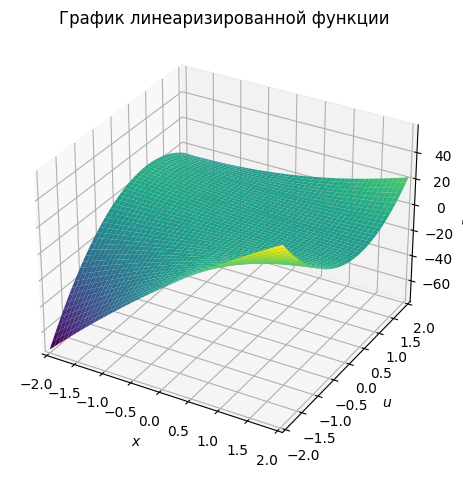

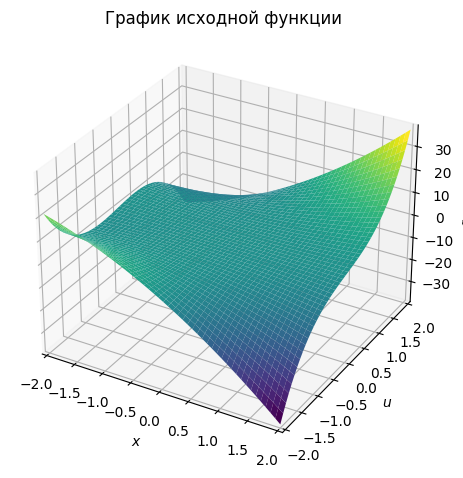

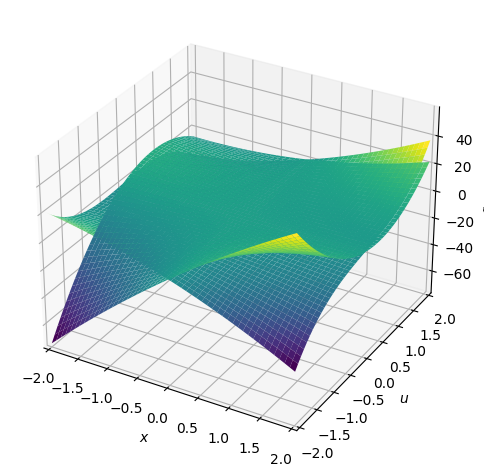

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

print(integ_f_t.subs({t:t0}))
print(integ_L_t.subs({t:t0}))


p = plot3d(integ_L_t.subs({t:t0}), (x, -2, 2), (u, -2, 2),  title='График линеаризированной функции')
plot3d(integ_f_t.subs({t:t0}), (x, -2, 2), (u, -2, 2), title='График исходной функции')
plot3d(integ_f_t.subs({t:t0}), integ_L_t.subs({t:t0}), (x, -2, 2), (u, -2, 2))

max T: 10
шаг: 0.01


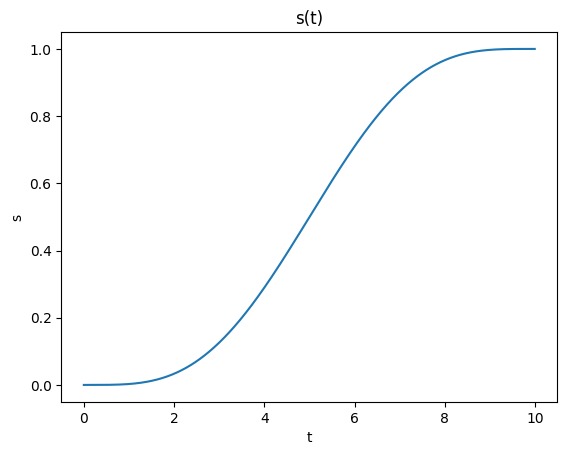

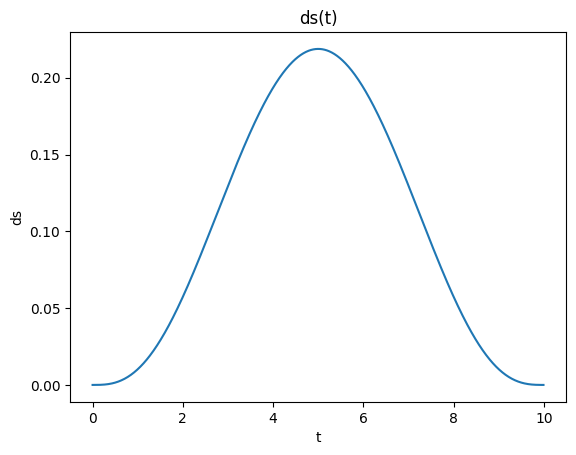

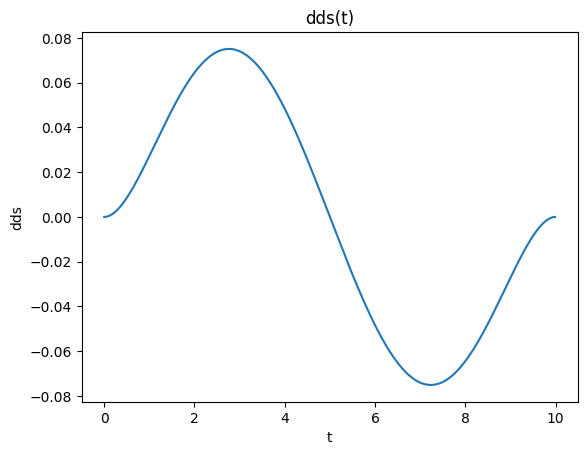

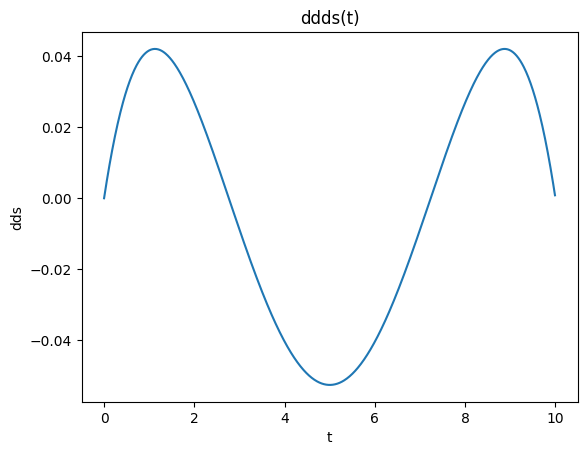

In [35]:
# Реализовать интерполяцию траектории полиномом седьмого порядка (exercise 9.5, но порядок полинома выше), показать графики s(t), ds(t), dds(t), ddds(t)
import matplotlib.pyplot as plt
import numpy as np

T = int(input('max T: '))
step = float(input('шаг: '))
s = []
ds = []
dds = []
ddds = []

vec_step_time = np.arange(0.0, T, step)

for t in vec_step_time[0:]:
  a0 = 0
  a1 = 0
  a2 = 0
  a3 = 0
  a4 = 35 / T ** 4
  a5 = -84 / T ** 5
  a6 = 70 / T ** 6
  a7 = -20 / T ** 7
  s.append(a0 + a1*t + a2*t**2 + a3*t**3 +a4*t**4 + a5*t**5 + a6*t**6 + a7*t**7)
  ds.append(a1 + 2*a2*t + 3*a3*t**2 + 4*a4*t**3 + 5*a5*t**4 + 6*a6*t**5 + 7*a7*t**6)
  dds.append(2*a2 + 6*a3*t + 12*a4*t**2 + 20*a5*t**3 + 30*a6*t**4 + 42*a7*t**5)
  ddds.append(6*a3 + 24*a4*t + 60*a5*t**2 + 120*a6*t**3 + 210*a7*t**4)


t = np.arange(0.0, T, step)

plt.plot (t, s)
plt.title("s(t)")
plt.xlabel("t")
plt.ylabel("s")
plt.show()
plt.plot(t, ds)
plt.title("ds(t)")
plt.xlabel("t")
plt.ylabel("ds")
plt.show()
plt.plot(t, dds)
plt.title("dds(t)")
plt.xlabel("t")
plt.ylabel("dds")
plt.show()
plt.plot(t, ddds)
plt.title("ddds(t)")
plt.xlabel("t")
plt.ylabel("dds")
plt.show()


# a0, a1, a2, a3, a4, a5, a6, a7 = symbols('a0 a1 a2 a3 a4 a5 a6 a7')
# s = a0 + a1*t + a2*t**2 + a3*t**3 +a4*t**4 + a5*t**5 + a6*t**6 + a7*t**7

# проверка для производных
# ds = diff(s, t)
# dds = diff(ds, t)
# ddds = diff(dds, t)

# print(ds)
# print(dds)
# print(ddds)
